# Police presence in Nigeria.

this note book aims to study the presence of police in various zones and states in nigeria, and their adequacy for the population, the data was gathered from the crime statistics report of the Nigerian Bureau of Statistics, the data was seperated from the the general work sheet with minimal cleaning in excel to better perform as a csv file in the python environment, 
The officer per zone population data was gathered from the the website of the Nigerian police force and compiled into csv format with the addition of columns that were suited to the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
posts = pd.read_csv('..../input/police_posts_in_nigeria.csv')
zonedata = pd.read_csv('.../input/IONNO.csv')

In [3]:
print ("posts: ",posts.shape[0],"states/rows, and ",posts.shape[1],"columns")

posts:  38 states/rows, and  16 columns


## Data visualisations

In [4]:
print (posts.columns)


Index([' ZONE ', ' ZONAL HQ ', ' STATE COMMANDS ', 'ZHNO', 'STCNO',
       ' AREA COMMANDS ', ' DIVISIONAL HQ ', ' POLICE STATIONS ',
       ' POLICE POSTS ', ' VILLAGE POSTS ', 'TOLAV-V', 'TOTAL',
       'STATE POPULATION', 'STATEAREAKM2', 'PEOPLEPERKM2', 'PXA'],
      dtype='object')


In [5]:
print (zonedata.columns)

Index(['ZONE', 'POP', 'CIVPOP', 'post/zone', 'AREAKM2'], dtype='object')


the 12 polices zones is losely based on the six geopolitical zones of nigeria,the geopolitical division of nigeria is based on geography and the similarity of the ethnic group with some zones ending up larger than the other due in part to sparser population and similars cultures in more ethnic groups. 
the 12 police zones take into account the denser population in major cities such as lagos and Kano either by pairing them with sparsely populated neighbouring states as in the case of Kano or with fewer state than the norm, due two this a few states are paired with states that are not in their geopolitical zones such as ekiti paired with north central states as a southwestern atate and ebonyi seperated from the rest of the south eastern states.
the federal capital territory is also taken into account to and is paired with neighbouring states in the north central
and north west

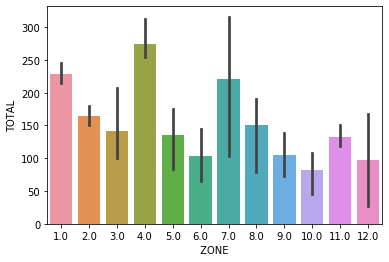

In [6]:
 sns.barplot(x=' ZONE ', y='TOTAL', data=posts)

since several states share the same zone, using the zone  this does not give the accurate representation of posts perzone but rather shows the averages with a margin of error

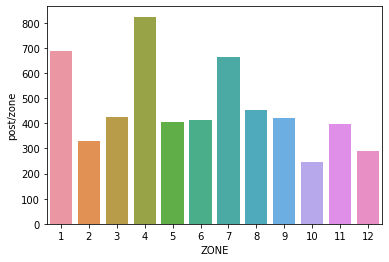

In [7]:
 sns.barplot(x='ZONE', y='post/zone', data=zonedata)

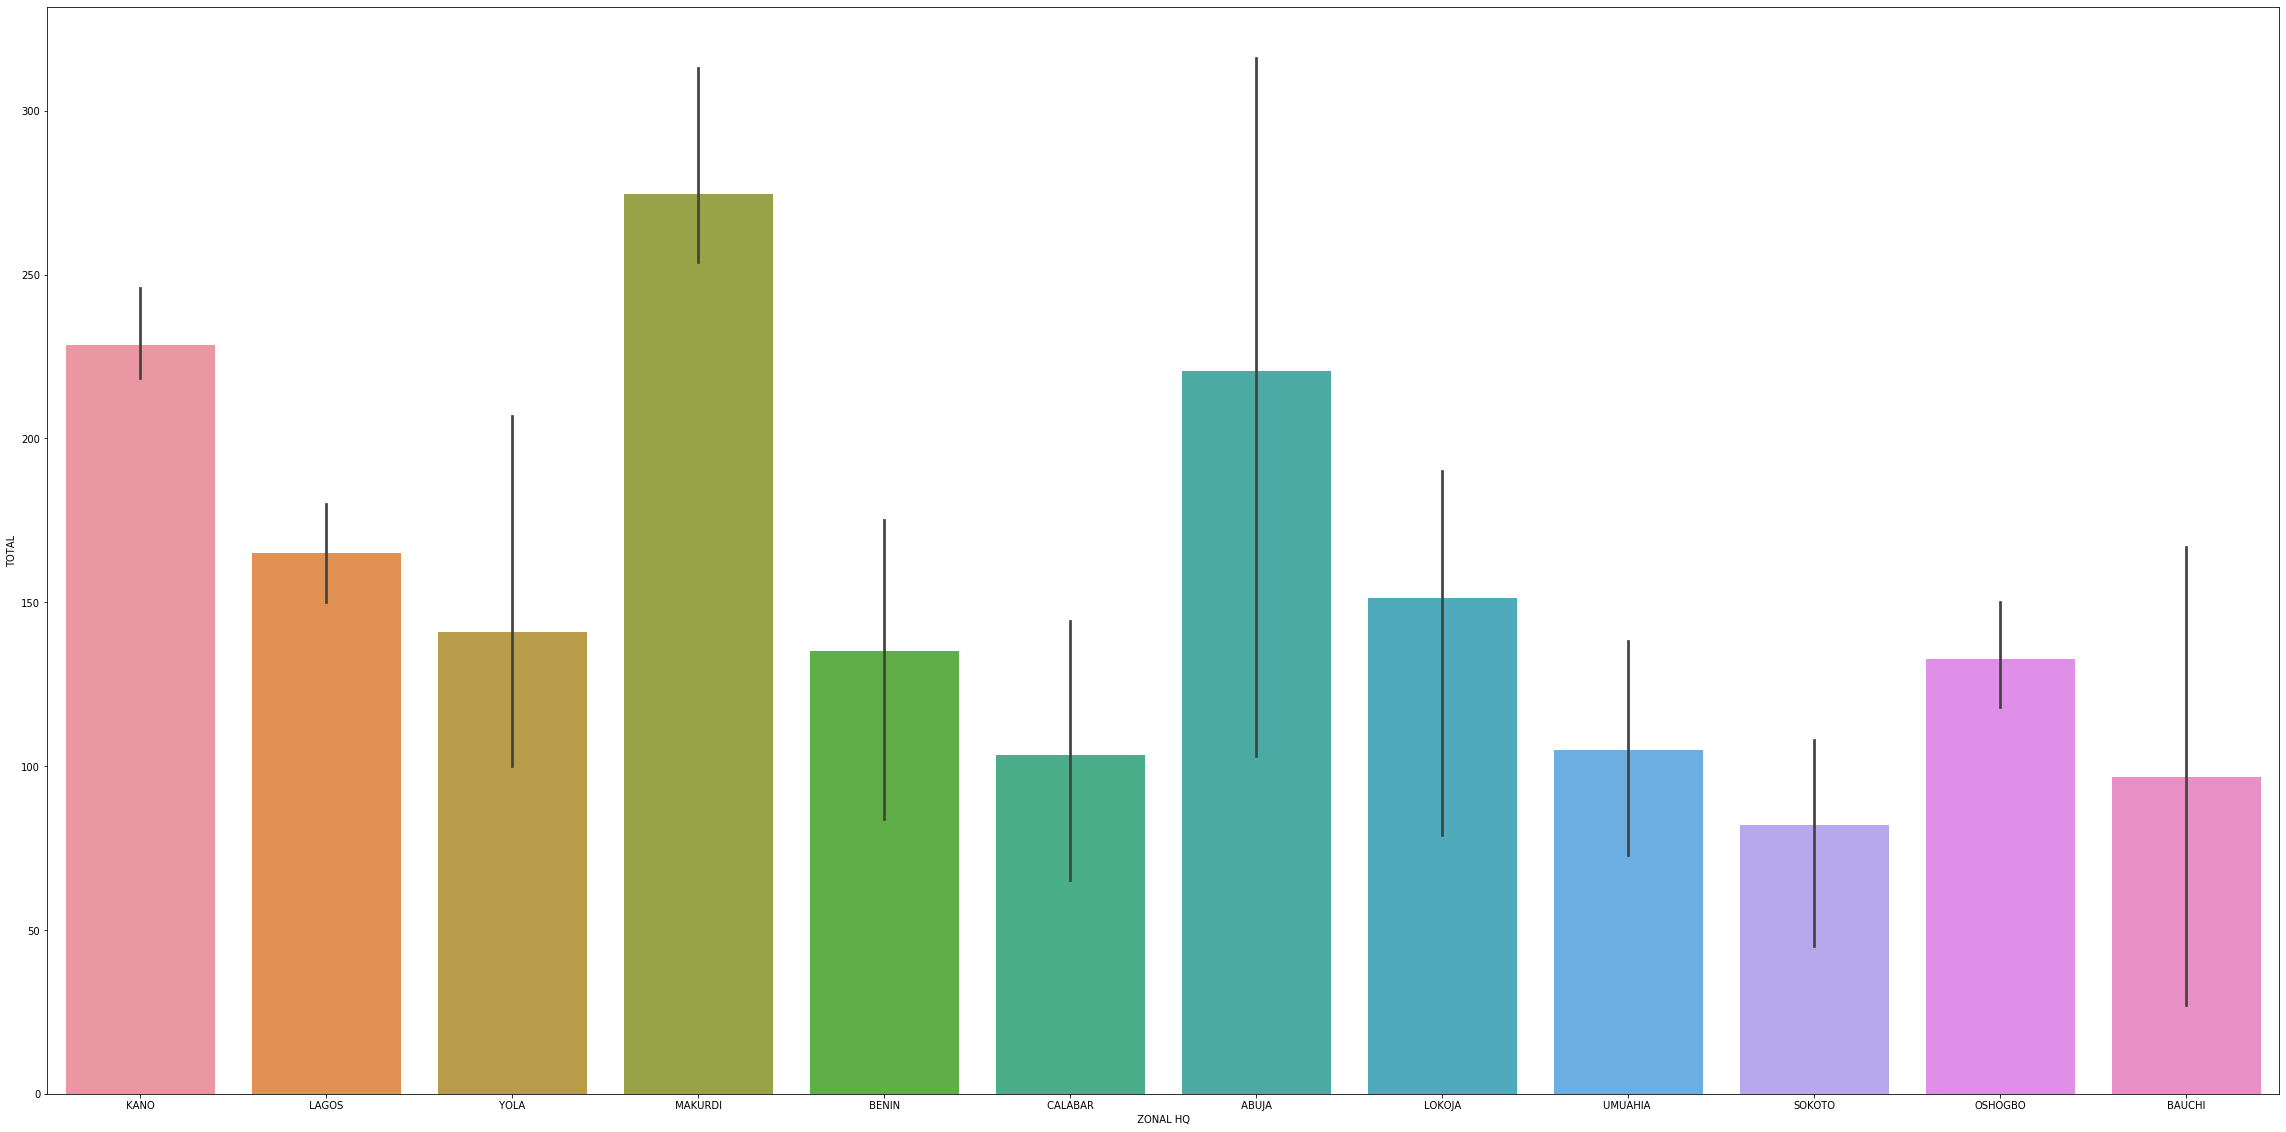

In [8]:
plt.figure(figsize=(40,20))
sns.barplot(x=' ZONAL HQ ', y='TOTAL', data=posts)

In [9]:
print((posts.corr())['TOTAL'].sort_values(ascending=False)[1:10])

TOLAV-V              0.970083
 POLICE POSTS        0.853234
 POLICE STATIONS     0.653874
 VILLAGE POSTS       0.573323
PXA                  0.351836
STATE POPULATION     0.306554
STATEAREAKM2         0.274279
 AREA COMMANDS       0.073125
PEOPLEPERKM2        -0.109090
Name: TOTAL, dtype: float64


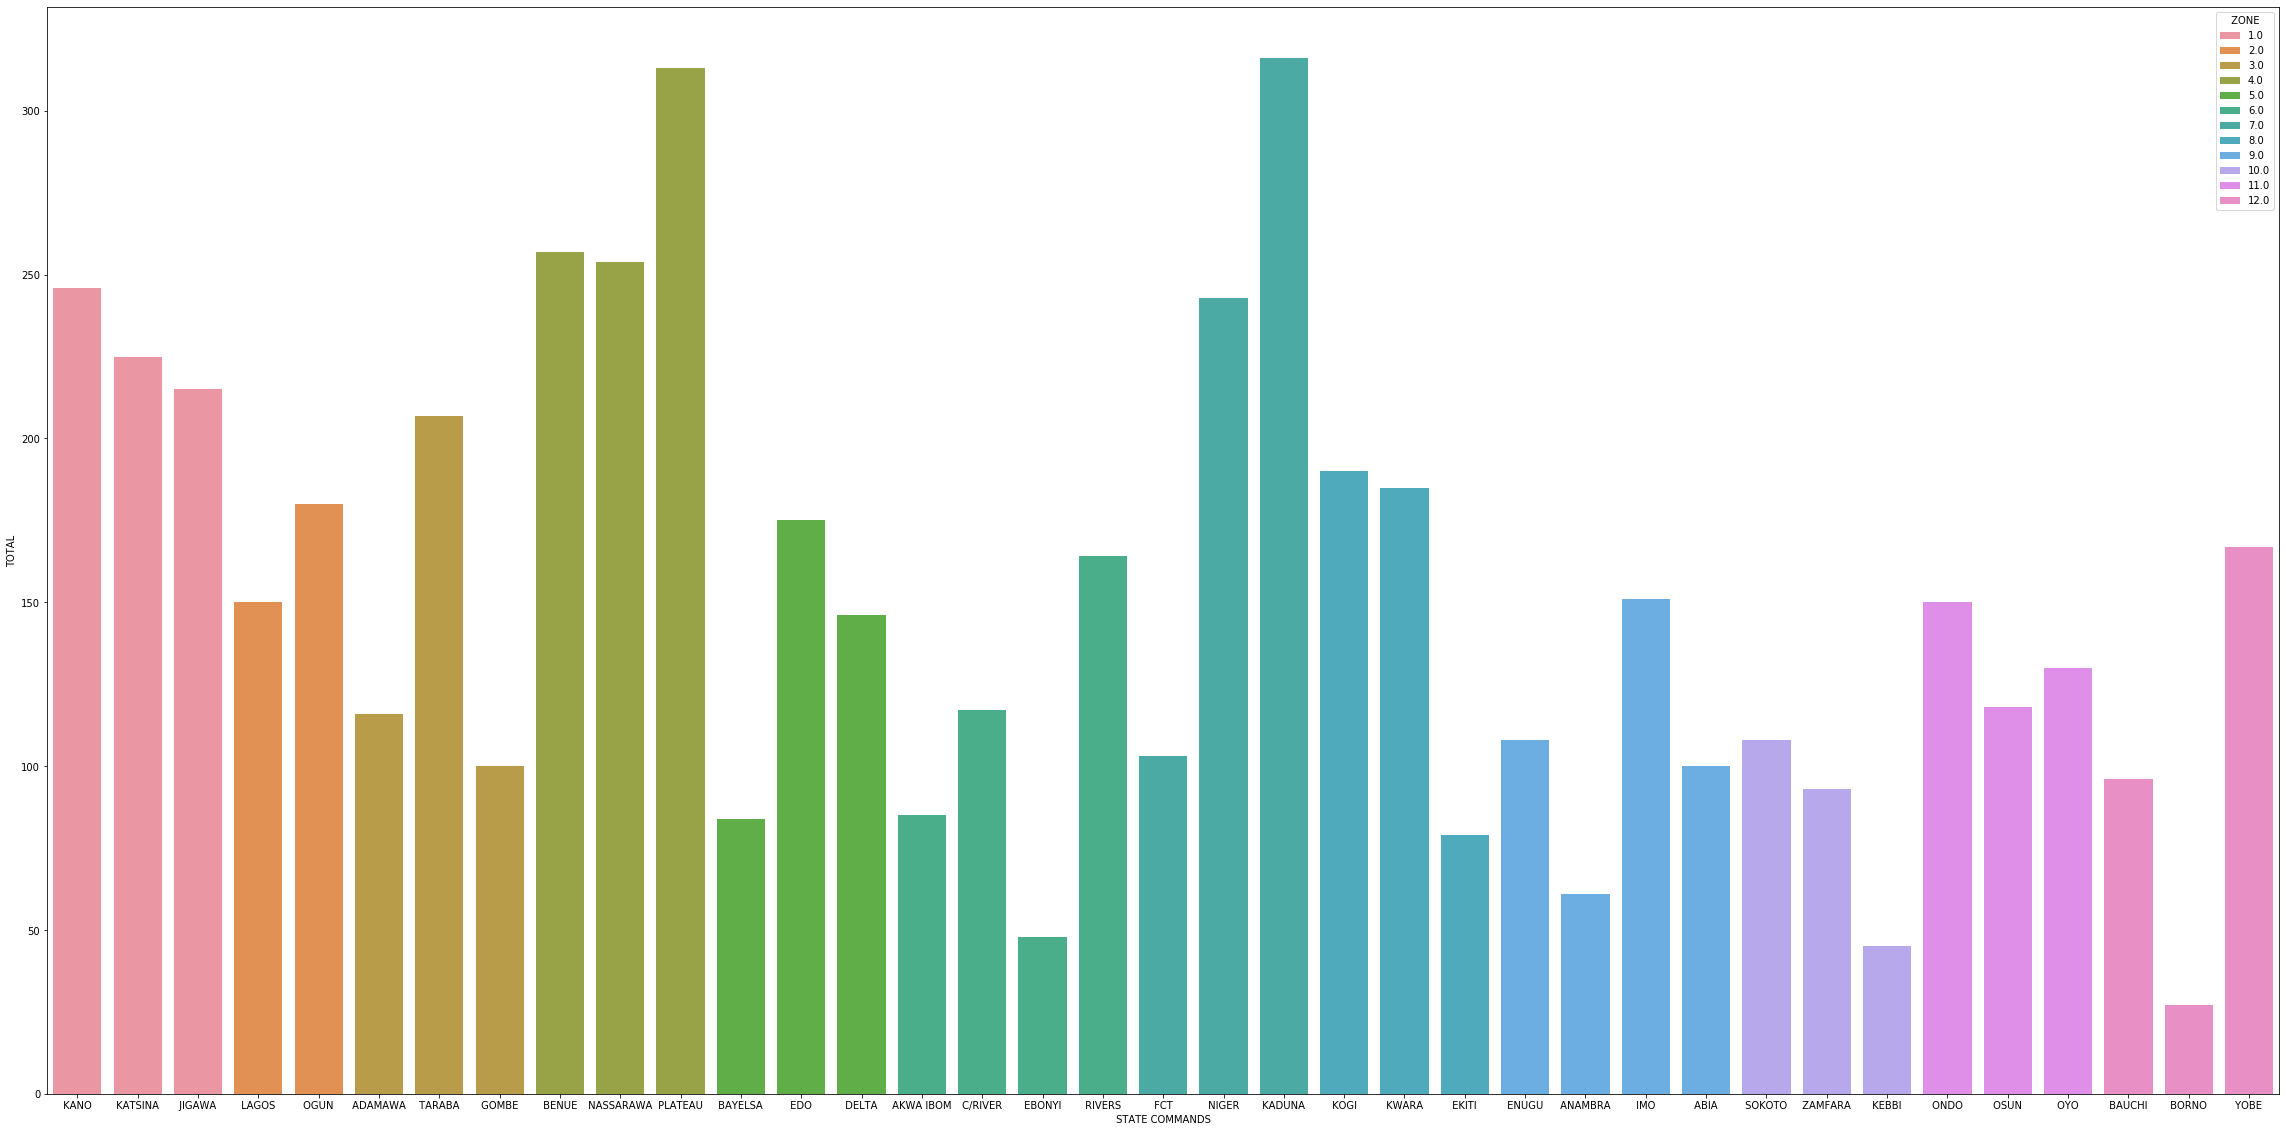

In [10]:
plt.figure(figsize=(40,20))
sns.barplot(x=' STATE COMMANDS ', y='TOTAL', hue=' ZONE ', data=posts, dodge=False)

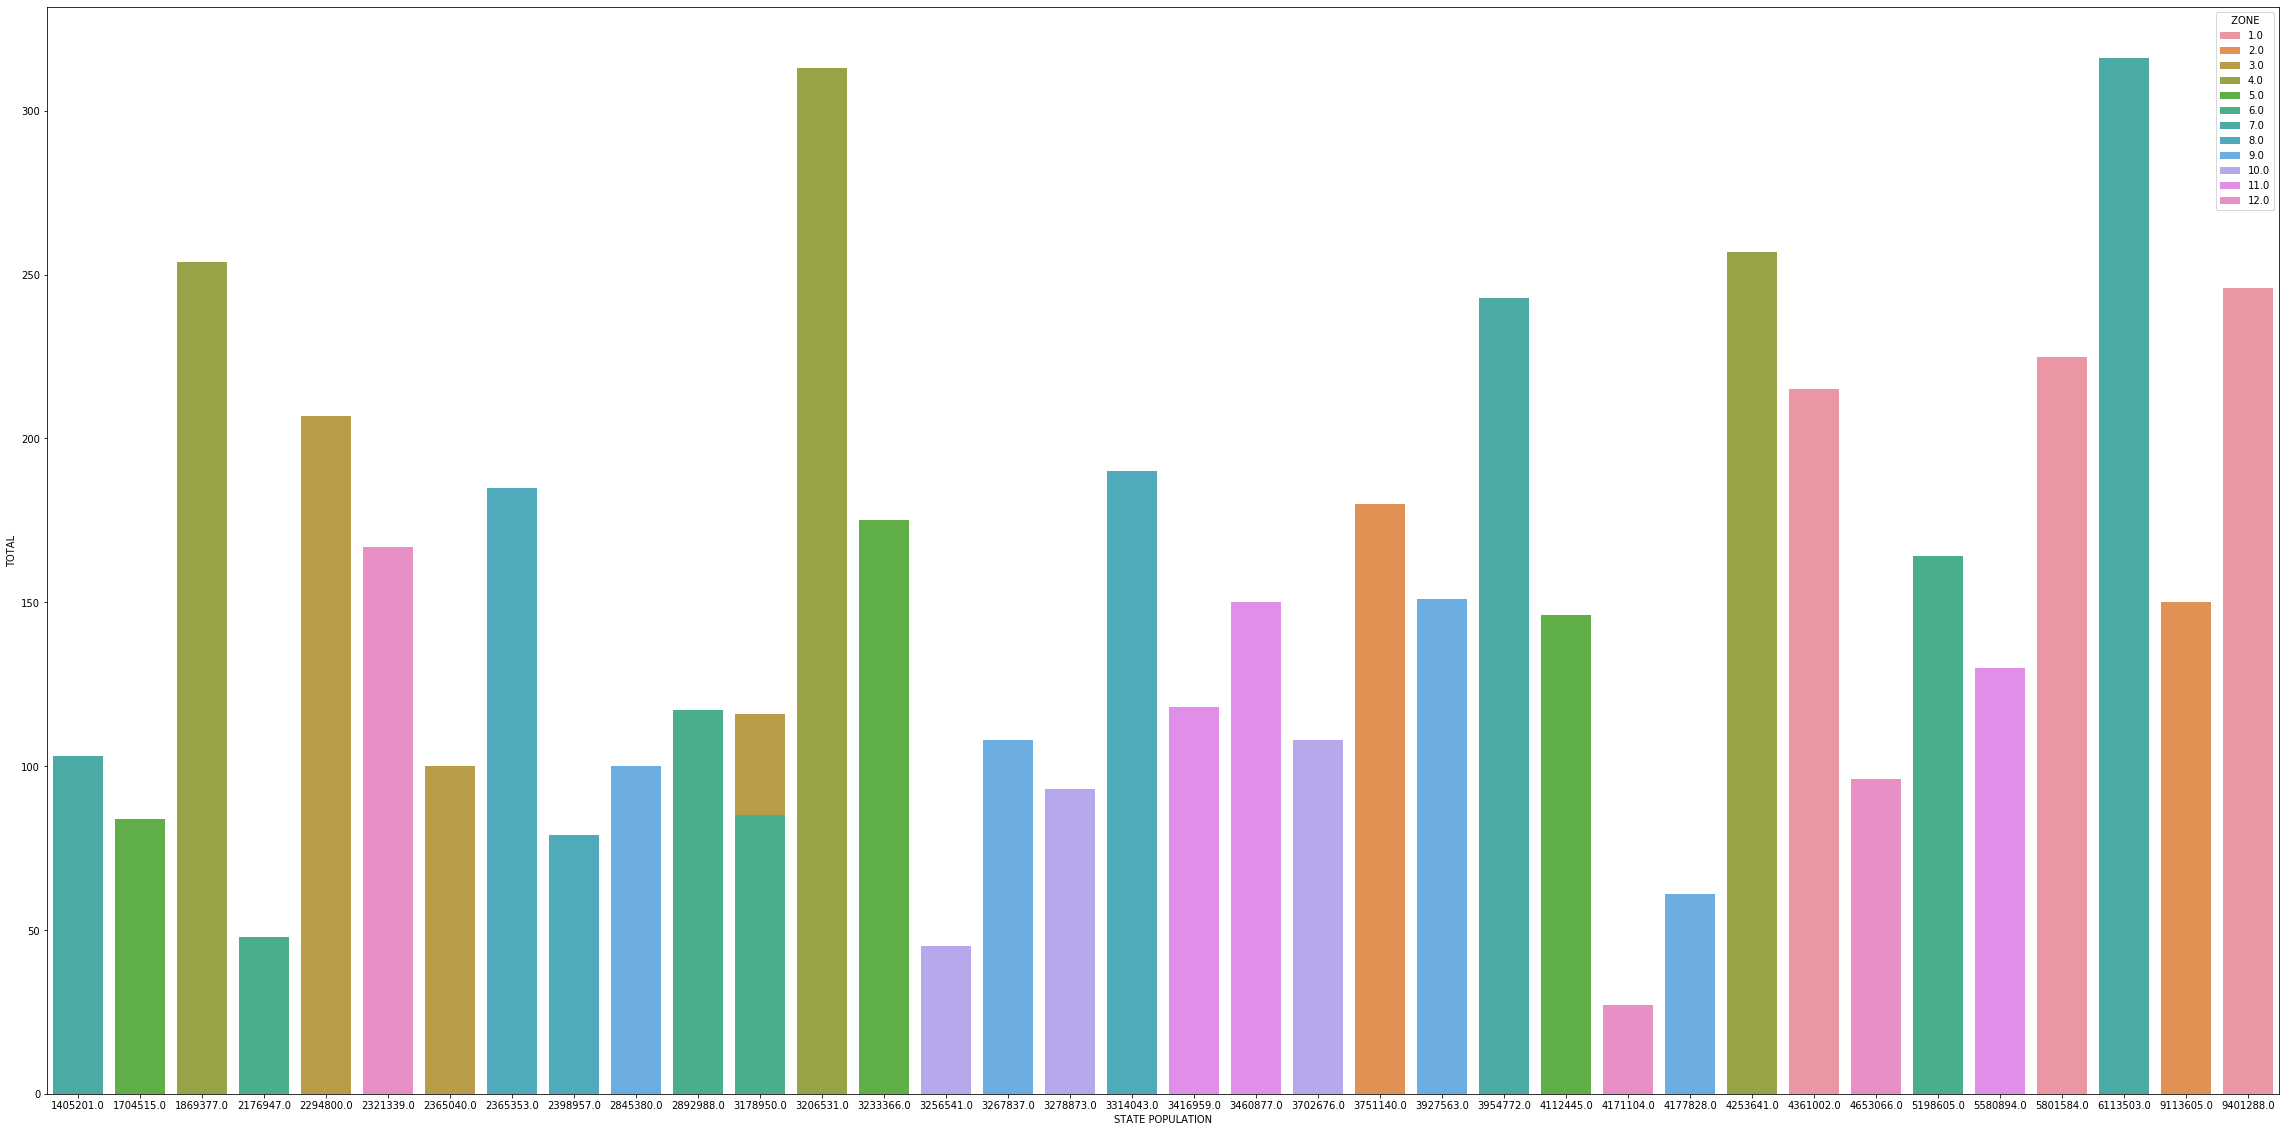

In [11]:
plt.figure(figsize=(40,20))
sns.barplot(x='STATE POPULATION', y='TOTAL', hue=' ZONE ', data=posts, dodge=False)

borno has the lowest police presence in the country but this is due in part to the recent waves of insurgency and thus security is largely handled by the nigerian military
other states due to their small size.
other obvious consideration for police presence is population and size,
lagos state has a small area yet a large population due to its high population

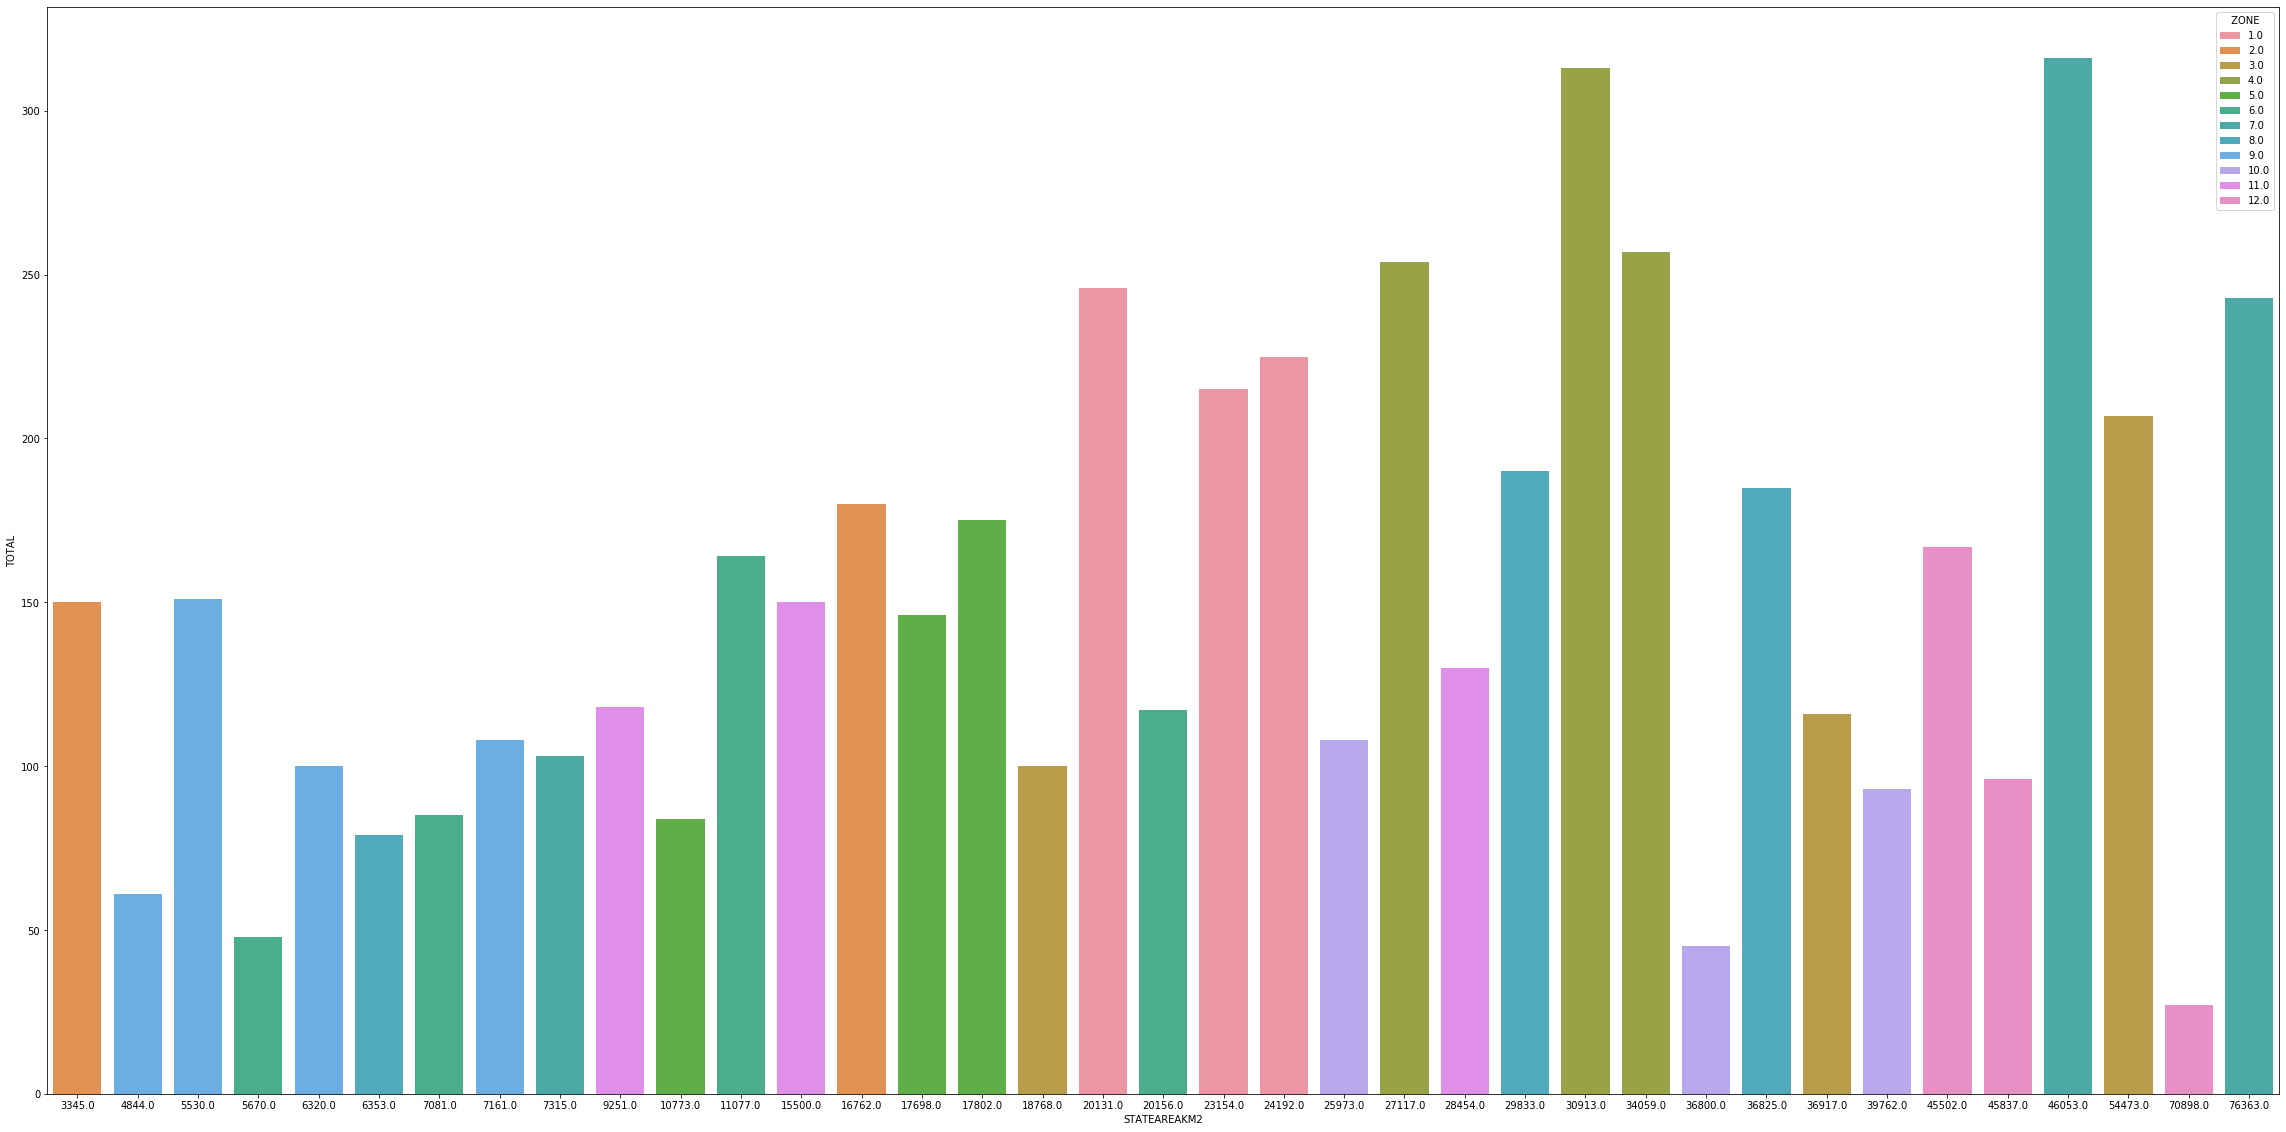

In [12]:
plt.figure(figsize=(40,20))
sns.barplot(x= 'STATEAREAKM2', y='TOTAL', hue=' ZONE ', data=posts, dodge=False)

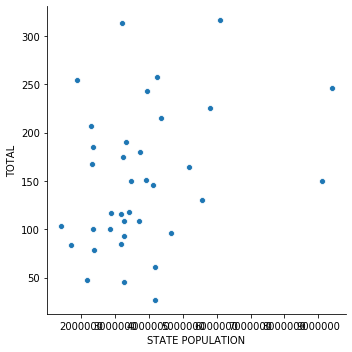

In [13]:
sns.relplot(x='STATE POPULATION', y='TOTAL', data=posts)

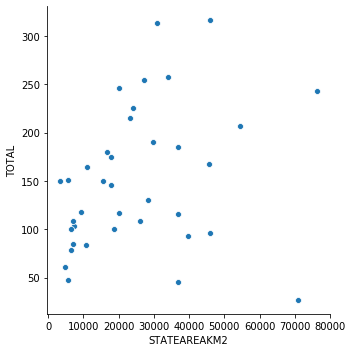

In [14]:
sns.relplot('STATEAREAKM2', y='TOTAL', data=posts)

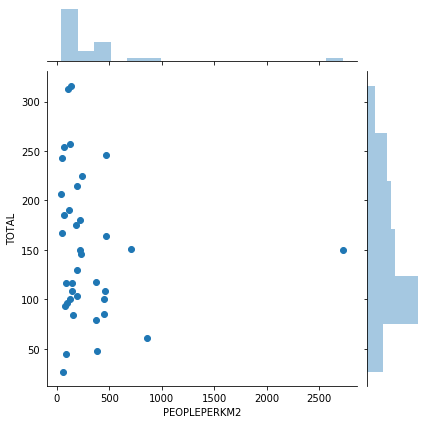

In [15]:
sns.jointplot(x='PEOPLEPERKM2', y='TOTAL', data=posts)

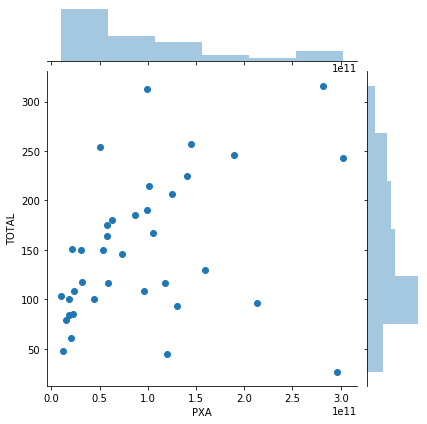

In [16]:
sns.jointplot(x='PXA', y='TOTAL', data=posts)

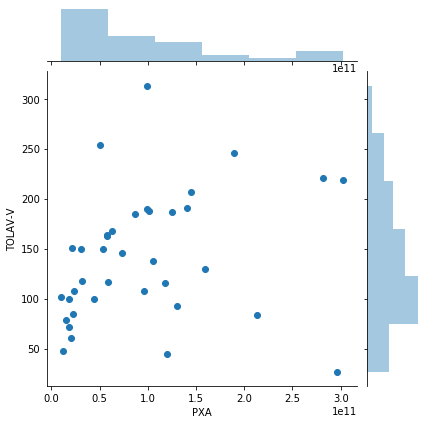

In [17]:
sns.jointplot(x='PXA', y='TOLAV-V', data=posts)

the shows a clearer trend this way with the combination of population and area, theonly major outlier is borno and this is for reasons previously stated

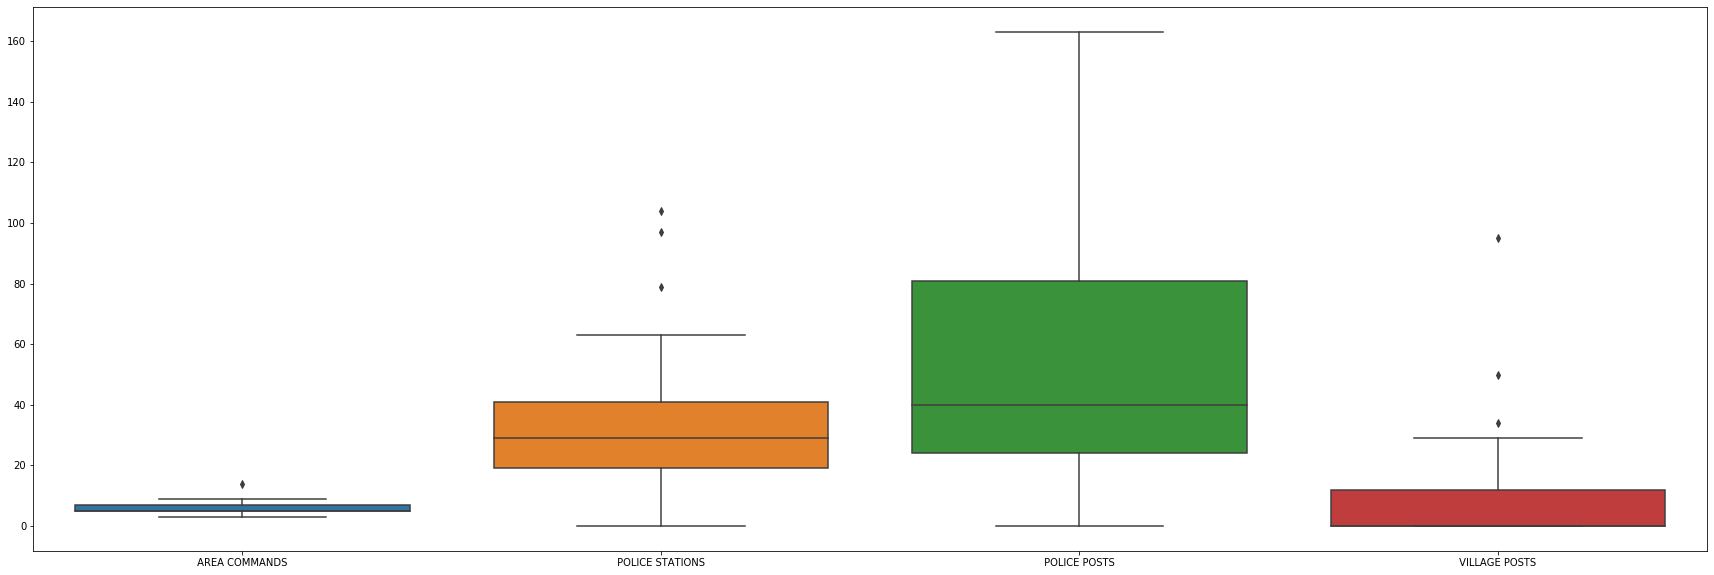

In [18]:
plt.figure(figsize=(30,10))
stats = posts.drop([' ZONE ', ' ZONAL HQ ', ' STATE COMMANDS ', 'ZHNO', 'STCNO', 'TOTAL','STATE POPULATION','STATEAREAKM2', 'PEOPLEPERKM2','TOLAV-V', 'PXA'], axis=1)
sns.boxplot(data=stats)

police posts form the majority of all stations in the country with a  majority of the states having inbetween 20 and 80 posts

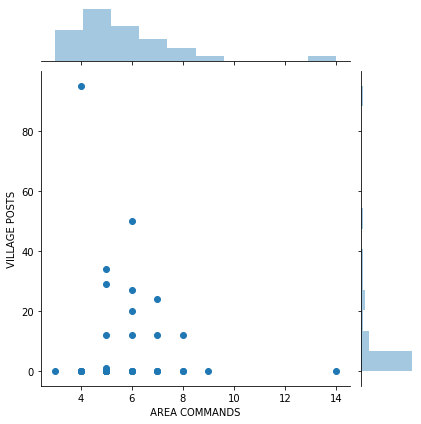

In [19]:
sns.jointplot(x=' AREA COMMANDS ', y=' VILLAGE POSTS ', data=posts)

there seems to be an increase in the presence of village posts with few area commands but the country isgenerally lacking in village posts with the exception of a few states

moving on the next there seem to be no proper relationship between,
oadd statistics for population ansarea

improvement to this cell involves the gathering of data on the exat number of police men in the area

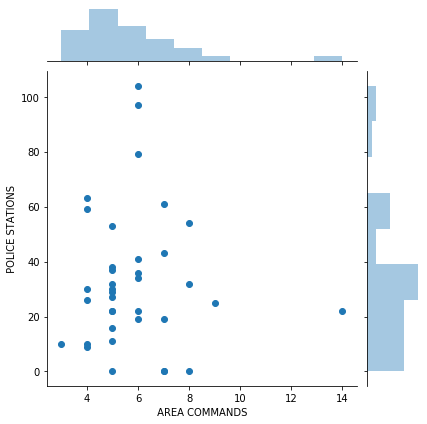

In [20]:
sns.jointplot(x=' AREA COMMANDS ', y=' POLICE STATIONS ', data=posts)

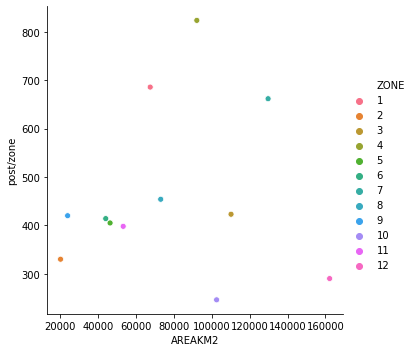

In [21]:
zonedata['ZONE'] = zonedata['ZONE'].astype('category')
sns.relplot(x='AREAKM2', y='post/zone',hue = 'ZONE',data=zonedata)

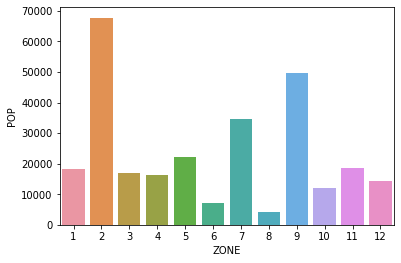

In [22]:
sns.barplot(x='ZONE', y='POP', data=zonedata)

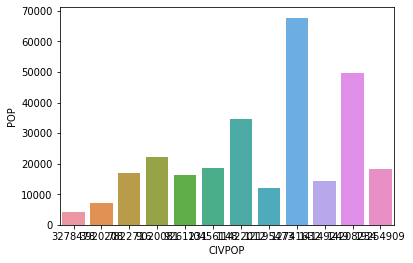

In [23]:
sns.barplot(x='CIVPOP', y='POP', data=zonedata)

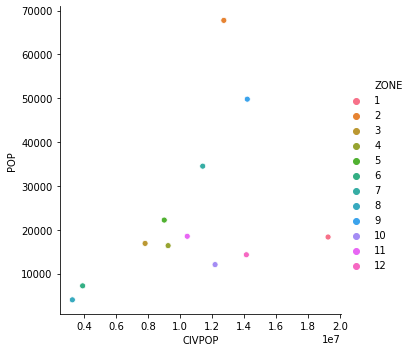

In [24]:
sns.relplot(x='CIVPOP', y='POP', hue ='ZONE', data=zonedata)

In [25]:
print((zonedata.corr())['POP'].sort_values(ascending=False)[1:10])

CIVPOP       0.423946
post/zone   -0.080507
AREAKM2     -0.441604
Name: POP, dtype: float64


In [26]:
zonedata['civa'] = zonedata['CIVPOP'] * zonedata['AREAKM2']

In [27]:
print((zonedata.corr())['POP'].sort_values(ascending=False)[1:10])

CIVPOP       0.423946
post/zone   -0.080507
civa        -0.213858
AREAKM2     -0.441604
Name: POP, dtype: float64


In [28]:
zonedata['civ/a'] = zonedata['CIVPOP'] / zonedata['AREAKM2']

In [29]:
print((zonedata.corr())['post/zone'].sort_values(ascending=False)[1:10])

CIVPOP     0.096343
AREAKM2    0.085242
civa       0.059870
POP       -0.080507
civ/a     -0.167911
Name: post/zone, dtype: float64


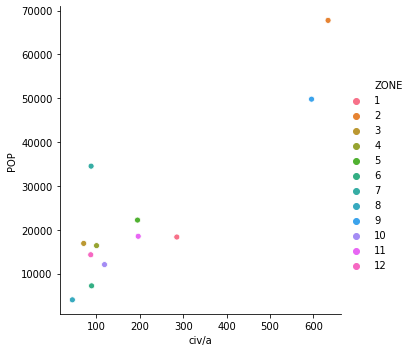

In [30]:
sns.relplot(x='civ/a', y='POP', hue ='ZONE', data=zonedata)

Population Density civ/a is found to be strongly related to the the population of police officers assigned to the zone

# Possible improvements

to gather  accurate data on police officer population in each state, gather more information on the exact location of each post, find out the amount of officers per station in each state, however this data is not being released to the public 